In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
filename= '/content/drive/MyDrive/Audio prediction/UrbanSound8K/UrbanSound8K/audio/fold10/100648-1-0-0.wav'

In [3]:
import IPython.display as ipd
import librosa
import librosa.display

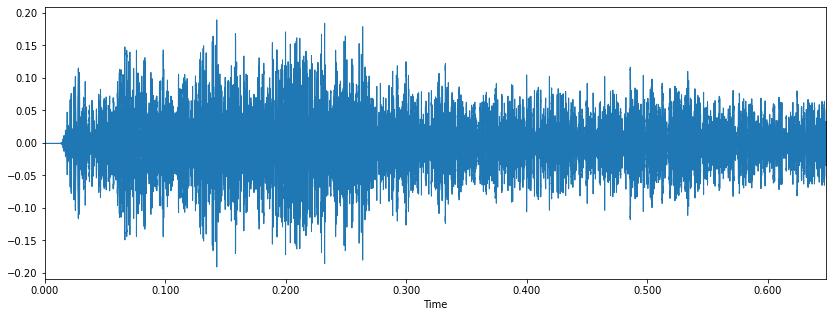

In [4]:
plt.figure(figsize=(14,5))
data, sample_rate= librosa.load(filename)
librosa.display.waveplot(data, sr=sample_rate)
ipd.Audio(filename)

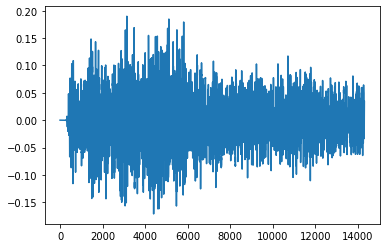

In [5]:
plt.plot(data)

In [6]:
sample_rate

22050

In [7]:
data

array([0.        , 0.        , 0.        , ..., 0.01810447, 0.02733562,
       0.03400249], dtype=float32)

In [8]:
###another option is scipy for wev files 
from scipy.io import wavfile as wev

wev_sample_rate, data_scify= wev.read(filename)


In [9]:
print(wev_sample_rate)
print(data_scify)

44100
[[   0    0]
 [   0    0]
 [   0    0]
 ...
 [1043 1043]
 [1026 1026]
 [1073 1073]]


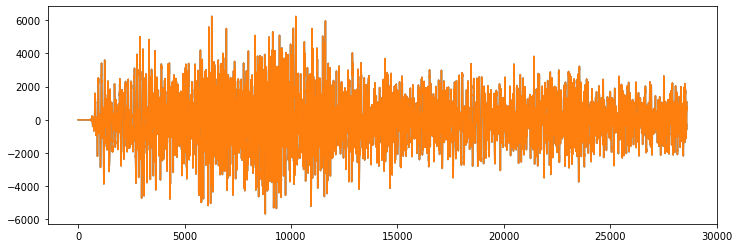

In [10]:
plt.figure(figsize=(12,4))
plt.plot(data_scify)

In [11]:
import numpy as np
import pandas as pd
dataset=pd.read_csv('/content/drive/MyDrive/Audio prediction/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv')

In [12]:
dataset.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [13]:
dataset.shape

(8732, 8)

In [14]:
dataset.size

69856

In [15]:
dataset['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

**extect feature Mel-frequency Capstral Coefficient**

In [16]:
mfcc= librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfcc.shape)

(40, 28)


In [17]:
mfcc

array([[-3.1895581e+02, -2.3942128e+02, -2.0357265e+02, ...,
        -2.0086092e+02, -2.0448689e+02, -2.0722505e+02],
       [ 1.3420425e+02,  1.2830580e+02,  1.2176123e+02, ...,
         1.0863275e+02,  1.0139013e+02,  1.0701703e+02],
       [ 2.0304191e-01,  4.4783659e+00, -3.0841732e+00, ...,
        -1.1387668e+01, -5.7280025e+00, -3.3810382e+00],
       ...,
       [-6.1883860e+00, -3.8724489e+00,  2.4436965e+00, ...,
         3.2355461e+00, -1.7571191e+00, -1.1406713e+00],
       [ 7.8616667e+00,  5.9473574e-01, -5.7830071e+00, ...,
        -4.5311007e+00, -2.4484234e+00, -1.0505850e+00],
       [-8.8828011e+00, -2.0356376e+00, -2.3477187e+00, ...,
        -7.5166661e-01,  3.9468117e+00,  3.7475438e+00]], dtype=float32)

In [18]:
audiofile='/content/drive/MyDrive/Audio prediction/UrbanSound8K/UrbanSound8K/audio'

In [19]:
def feature_extrector(file):
  audio, sample_rates= librosa.load(file_name, res_type='kaiser_fast')
  mfccs_feature= mfcc= librosa.feature.mfcc(y=audio, sr=sample_rates, n_mfcc=40)
  mfccs_scaled_features = np.mean(mfccs_feature.T,axis=0)
    
  return mfccs_scaled_features

In [20]:
import os
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(dataset.iterrows()):
    file_name = os.path.join(os.path.abspath(audiofile),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    datas=feature_extrector(file_name)
    extracted_features.append([datas,final_class_labels])



3555it [21:01,  2.80it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8326it [48:22,  3.00it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
8329it [48:23,  3.32it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [50:40,  2.87it/s]


In [21]:
extracted_features

[[array([-2.1495764e+02,  7.0502464e+01, -1.3070279e+02, -5.3116936e+01,
         -2.1206631e+01, -2.2533747e+01, -1.0577945e+01,  1.8482891e+01,
          6.9706159e+00,  1.4502217e+01, -1.1913271e+01,  2.6082008e+00,
         -1.7720625e+01,  1.0666121e+01, -6.7457919e+00, -4.8134613e-01,
         -1.8599041e+01,  2.0682685e+00, -5.3416796e+00,  8.2313919e+00,
         -1.2759135e+01, -6.5968986e+00,  4.6201234e+00, -2.1799343e+00,
         -6.5518794e+00,  4.9667194e-01, -3.7182662e+00,  5.0266728e+00,
         -6.1611209e+00, -5.0962682e+00,  1.1568884e+00,  7.2418213e+00,
         -1.3256733e-01,  1.7147715e+00, -5.6571107e+00, -2.9742901e+00,
          3.1327231e+00, -1.7985295e+00, -7.5557244e-01,  2.1362242e-01],
        dtype=float32), 'dog_bark'],
 [array([-4.23731110e+02,  1.09229897e+02, -5.28725967e+01,  6.08275375e+01,
          3.48053306e-01,  1.72516479e+01,  2.17315149e+00,  1.06253052e+01,
         -1.37355554e+00,  1.22368011e+01, -1.11380310e+01,  2.10162849e+01,
 

In [22]:
extracted_features_df=pd.DataFrame(extracted_features, columns=['features', 'class'])
extracted_features_df.head()

,features,class
0,"[-214.95764, 70.502464, -130.70279, -53.116936...",dog_bark
1,"[-423.7311, 109.2299, -52.872597, 60.827538, 0...",children_playing
2,"[-458.52844, 121.35432, -46.535675, 51.969467,...",children_playing
3,"[-413.63254, 101.61351, -35.43868, 53.047146, ...",children_playing
4,"[-446.38693, 113.68634, -52.4572, 60.349724, 2...",children_playing


In [26]:
x=np.array(extracted_features_df['features'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [28]:
x.shape

(8732, 40)

In [31]:
y=np.array(pd.get_dummies(y))

In [32]:
y.shape

(8732, 10)

In [33]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [35]:
x_train.shape

(6985, 40)

**Model impliment**

In [36]:
import tensorflow as tf

In [38]:
tf.__version__

'2.8.2'

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [40]:
num_labels=y.shape[1]

In [41]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [43]:


model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')



In [50]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/Audio prediction/UrbanSound8K/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
205/219 [===========================>..] - ETA: 0s - loss: 0.8782 - accuracy: 0.7058
Epoch 1: val_loss improved from inf to 0.69644, saving model to /content/drive/MyDrive/Audio prediction/UrbanSound8K/audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 0.8738 - accuracy: 0.7074 - val_loss: 0.6964 - val_accuracy: 0.7853
Epoch 2/100
213/219 [============================>.] - ETA: 0s - loss: 0.8807 - accuracy: 0.7097
Epoch 2: val_loss did not improve from 0.69644
219/219 [==============================] - 1s 4ms/step - loss: 0.8799 - accuracy: 0.7098 - val_loss: 0.6967 - val_accuracy: 0.7928
Epoch 3/100
213/219 [============================>.] - ETA: 0s - loss: 0.8787 - accuracy: 0.7033
Epoch 3: val_loss improved from 0.69644 to 0.68369, saving model to /content/drive/MyDrive/Audio prediction/UrbanSound8K/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 0.8775 - accuracy: 0.7048 - val_loss: 0.6837 - 

In [51]:


test_accuracy=model.evaluate(x_test,y_test,verbose=0)
print(test_accuracy[1])



0.7956497073173523


In [55]:
prediction_feature=feature_extrector(filename)
prediction_feature=prediction_feature.reshape(1,-1)
#model.predict_classes(prediction_feature)
predictions = np.argmax(model.predict(prediction_feature),axis=1)
#predictions=(model.predict(prediction_feature) > 0.5).astype("int32")`


In [56]:
predictions

array([1])

In [66]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
y=to_categorical(labelencoder.fit_transform (y))

ValueError: ignored

In [62]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
y=to_categorical(labelencoder.fit_transform (y))
#filename="UrbanSound8K/drilling_1.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=np.argmax(model.predict(mfccs_scaled_features),axis=1)
np.argmax(model.predict(mfccs_scaled_features),axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class



ValueError: ignored

In [65]:
pd.DataFrame(y)

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8727,0,1,0,0,0,0,0,0,0,0
8728,0,1,0,0,0,0,0,0,0,0
8729,0,1,0,0,0,0,0,0,0,0
8730,0,1,0,0,0,0,0,0,0,0
